# Test section_id() with different strides and windows

In [1]:
%run ../docs/maintainer/sett.py #import packages and plot setup
Path("../extra").mkdir(exist_ok=True)


Settings loaded.


Data is computed once and stored in a pickle file used for plotting.

In [2]:
#STRIDE
states = ["u0", "u1", "u2", "f0", "f1", "f2"]
projection_method = "Dihedrals"
stride = [1,2,3,4,5,6,7,8,9]
window = 15
all_results = []
for s in states:
    for sr in stride:
        results = section_id(
            topology="examples/villin/2f4k.pdb",
            trajectory=f"examples/villin/2f4k_{s}.xtc",
            window_size=window,
            stride=sr,
            projection_method=projection_method,
            id_method="local",
            verbose=False,
        )
        results["trajectory"] = s
        results['stride'] = sr
        #results['window_size'] = window
        all_results.append(results)
results = pd.concat(all_results, ignore_index=True)
results["folded"] = results["trajectory"].str.startswith("f")
results["window"] = results["start"].astype(str) + "-" + results["end"].astype(str)

results.to_pickle(f"../extra/villin_sections/villin_strides_w{window}.pkl")


In [2]:
#WINDOW
states = ["u0", "u1", "u2", "f0", "f1", "f2"]
projection_method = "Dihedrals"
stride = 3
window = [5,10,15,20,25,30]
all_results = []
for s in states:
    for w in window:
        results = section_id(
            topology="examples/villin/2f4k.pdb",
            trajectory=f"examples/villin/2f4k_{s}.xtc",
            window_size=w,
            stride=stride,
            projection_method=projection_method,
            id_method="local",
            verbose=False,
        )
        results["trajectory"] = s
        #results['stride'] = stride
        results['window_size'] = w
        
        all_results.append(results)
results = pd.concat(all_results, ignore_index=True)
results["folded"] = results["trajectory"].str.startswith("f")
results["window"] = results["start"].astype(str) + "-" + results["end"].astype(str)

results.to_pickle(f"../extra/villin_sections/villin_windows_s{stride}.pkl")


## Plot the results

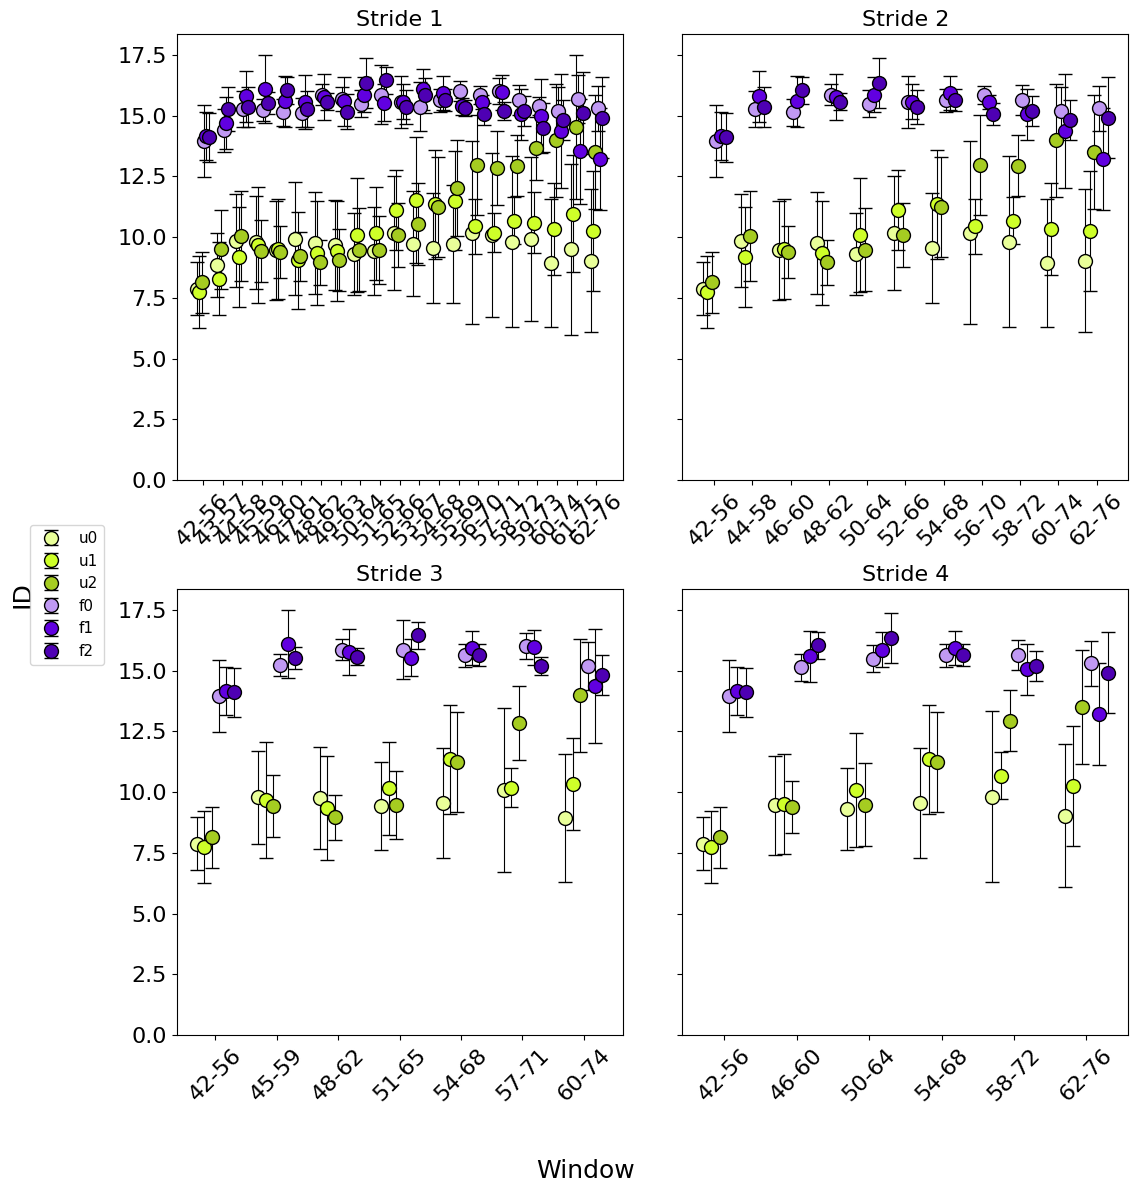

In [74]:
#individual plots
#MULTI STRIDE

results = pd.read_pickle(f"../extra/villin_sections/villin_strides_w15.pkl")
#stride = results['stride'].unique()
stride = [1,2,3,4]
n_stride = len(stride)
shift_amount = 0.3
unique_trajectories = results["trajectory"].unique()
n_traj = len(unique_trajectories)
shifts = np.linspace(-shift_amount, shift_amount, n_traj)

fig, ax = plt.subplots(figsize=(12,12), ncols = 2,nrows=2, sharey=True)
axes = ax.flatten()

for n, sr in enumerate(stride): 
    result=results[results['stride'] == sr]
    for i, trajectory in enumerate(unique_trajectories):
        subset = result[result["trajectory"] == trajectory]
        x_labels = subset["window"].values
        x_positions = np.arange(len(x_labels))
        x_shifted = x_positions + shifts[i]
        y_std = subset["instantaneous"].apply(np.std).values
        y = subset["entire simulation"].values

        axes[n].errorbar(x_shifted, y, yerr=y_std, fmt="o", color=colors.colors[i], markeredgecolor="black", ecolor="black", elinewidth=0.8, capsize=5, markersize=10, label=f"{trajectory}", )
    # ax.scatter(x_shifted, y,color=colors.colors[i], edgecolor='black', s=100, label=f"{trajectory}")
    axes[n].set_title(f"Stride {sr}", fontsize = 16)
    axes[n].set_xticks(np.arange(len(x_labels)))
    axes[n].set_xticklabels(x_labels, rotation=45, fontsize=16)
    axes[n].set_box_aspect(1)
for ax_i in axes:
    ax_i.tick_params(axis='y', labelsize=16)       
    
plt.ylim(0, y.max() + 2)
fig.supxlabel("Window", fontsize=18)
fig.supylabel("ID", fontsize=18)
labels = unique_trajectories
fig.legend(labels, loc="center left", bbox_to_anchor = [0.03, 0.5])

fig.tight_layout(rect=[0.05, 0.03, 0.98, 1]) 

plt.savefig(f"../extra/villin_sections/villin_strides_w15.pdf", dpi=300)
plt.show()


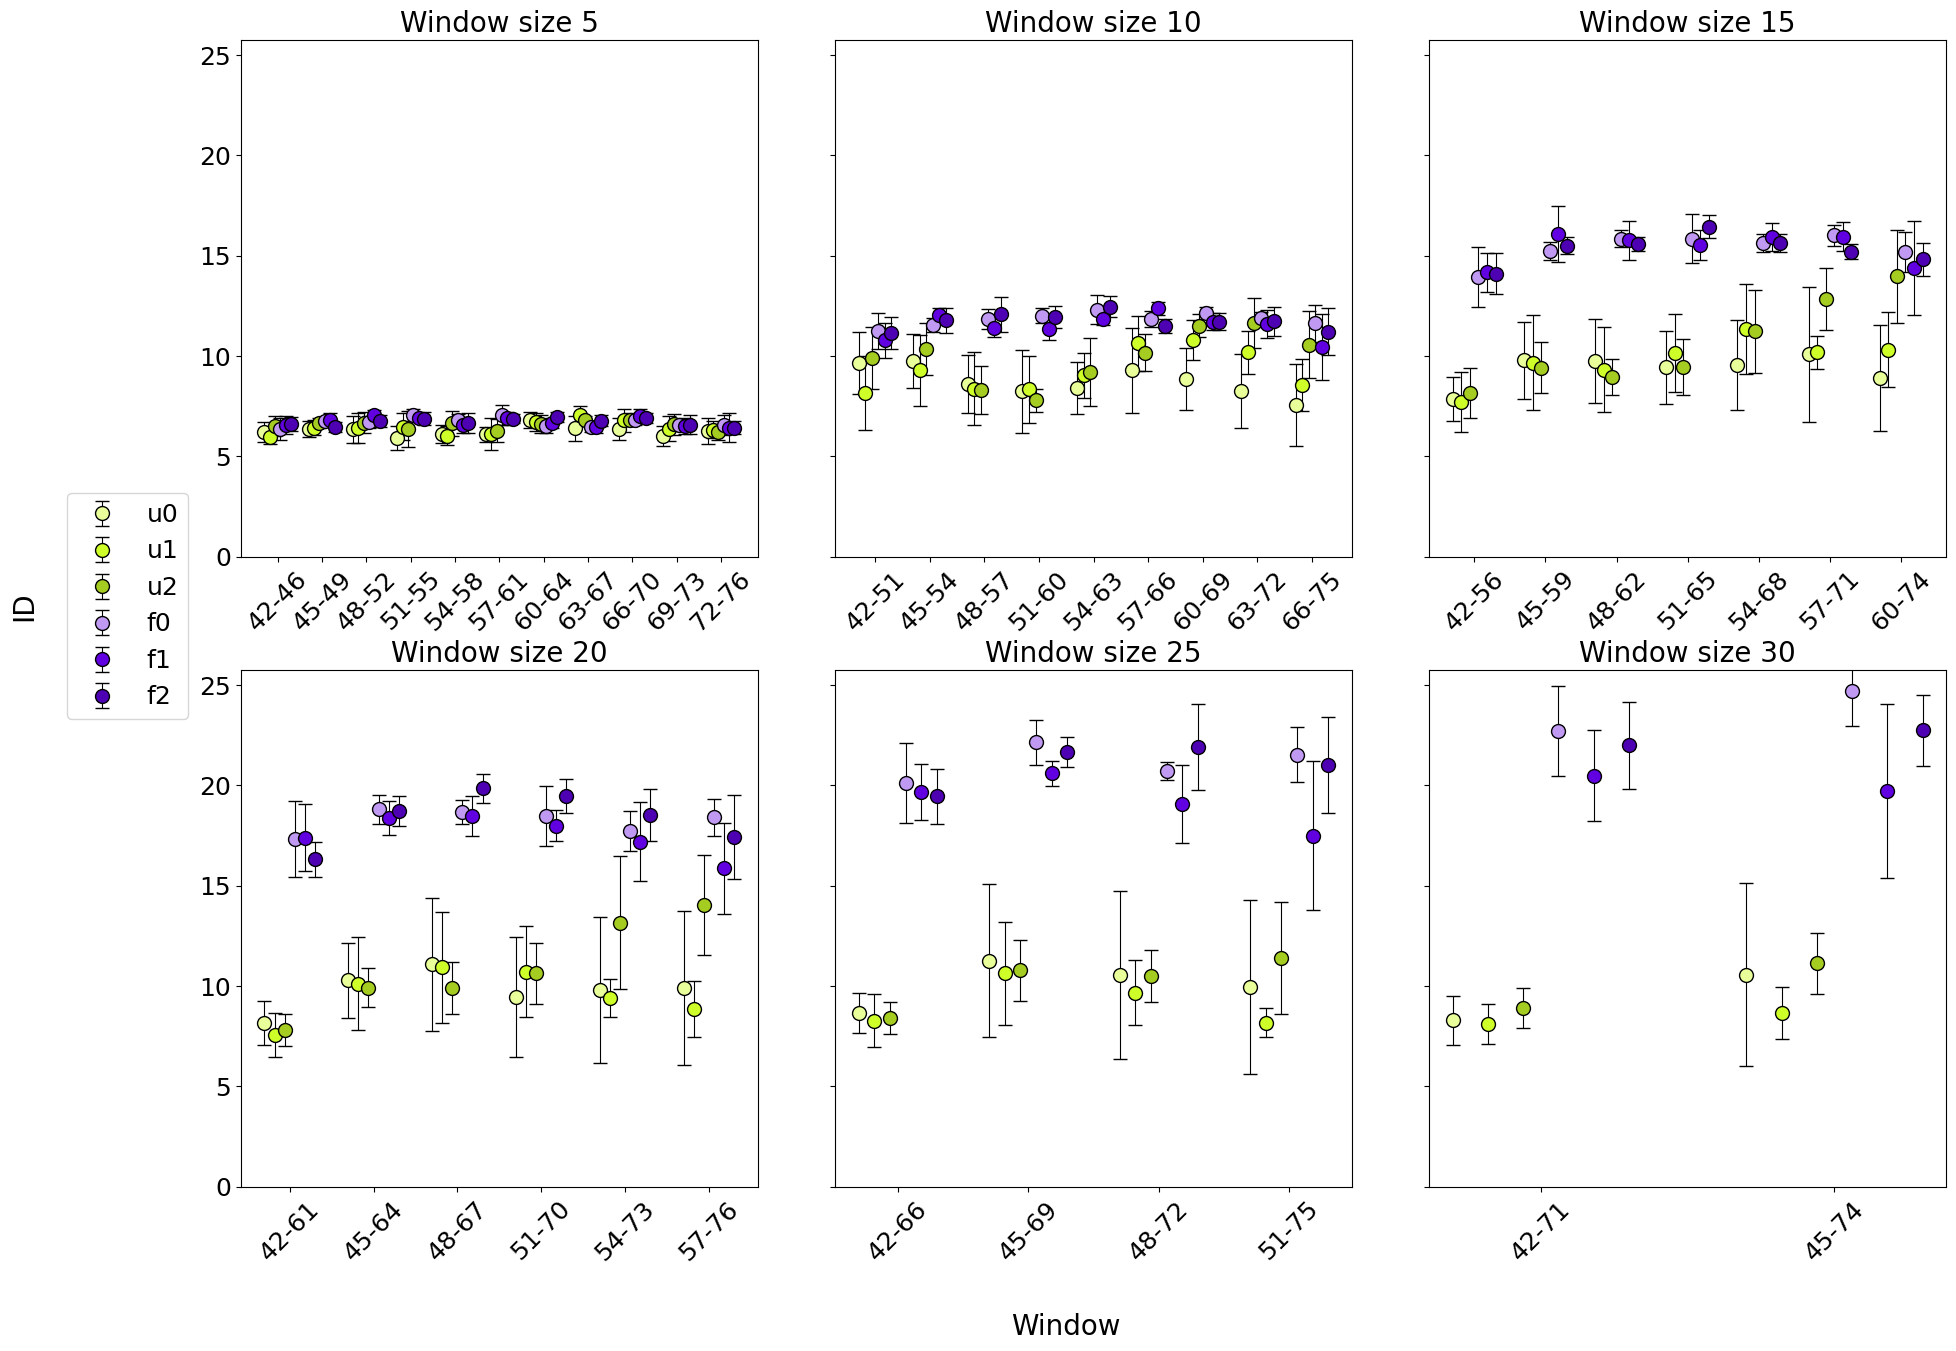

In [89]:
#individual plots
#MULTI WINDOW

results = pd.read_pickle(f"../extra/villin_sections/villin_windows_s3.pkl")
window_size = results['window_size'].unique()
n_windows = len(window_size)
shift_amount = 0.3
unique_trajectories = results["trajectory"].unique()
n_traj = len(unique_trajectories)
shifts = np.linspace(-shift_amount, shift_amount, n_traj)

fig, ax = plt.subplots(figsize=(22,15), ncols = 3, nrows =2, sharey=True)
axes = ax.flatten()

for n, sr in enumerate(window_size): 
    result=results[results['window_size'] == sr]
    for i, trajectory in enumerate(unique_trajectories):
        subset = result[result["trajectory"] == trajectory]
        x_labels = subset["window"].values
        x_positions = np.arange(len(x_labels))
        x_shifted = x_positions + shifts[i]
        y_std = subset["instantaneous"].apply(np.std).values
        y = subset["entire simulation"].values

        axes[n].errorbar(x_shifted, y, yerr=y_std, fmt="o", color=colors.colors[i], markeredgecolor="black", ecolor="black", elinewidth=0.8, capsize=5, markersize=10, label=f"{trajectory}", )
    # ax.scatter(x_shifted, y,color=colors.colors[i], edgecolor='black', s=100, label=f"{trajectory}")
    axes[n].set_title(f"Window size {sr}", fontsize= 20)
    axes[n].set_xticks(np.arange(len(x_labels)))
    axes[n].set_xticklabels(x_labels, rotation=45, fontsize=18)
    axes[n].set_box_aspect(1) 
for ax_i in axes:
    ax_i.tick_params(axis='y', labelsize=18)     
plt.ylim(0, y.max() + 3)
fig.supxlabel("Window", fontsize=20)
fig.supylabel("ID", fontsize=20)

labels = unique_trajectories
fig.legend(labels, loc="center left", bbox_to_anchor = [0.04, 0.5], fontsize = 18)

fig.tight_layout(rect=[1, 0.03, 1, 0.97]) 
fig.subplots_adjust(wspace=0.15, hspace=0.20)
plt.savefig(f"../extra/villin_sections/villin_windows_s3.pdf", dpi=300)
plt.show()



2025-12-02 14:53:26,206 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-02 14:53:26,210 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-02 14:53:26,328 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-02 14:53:26,332 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


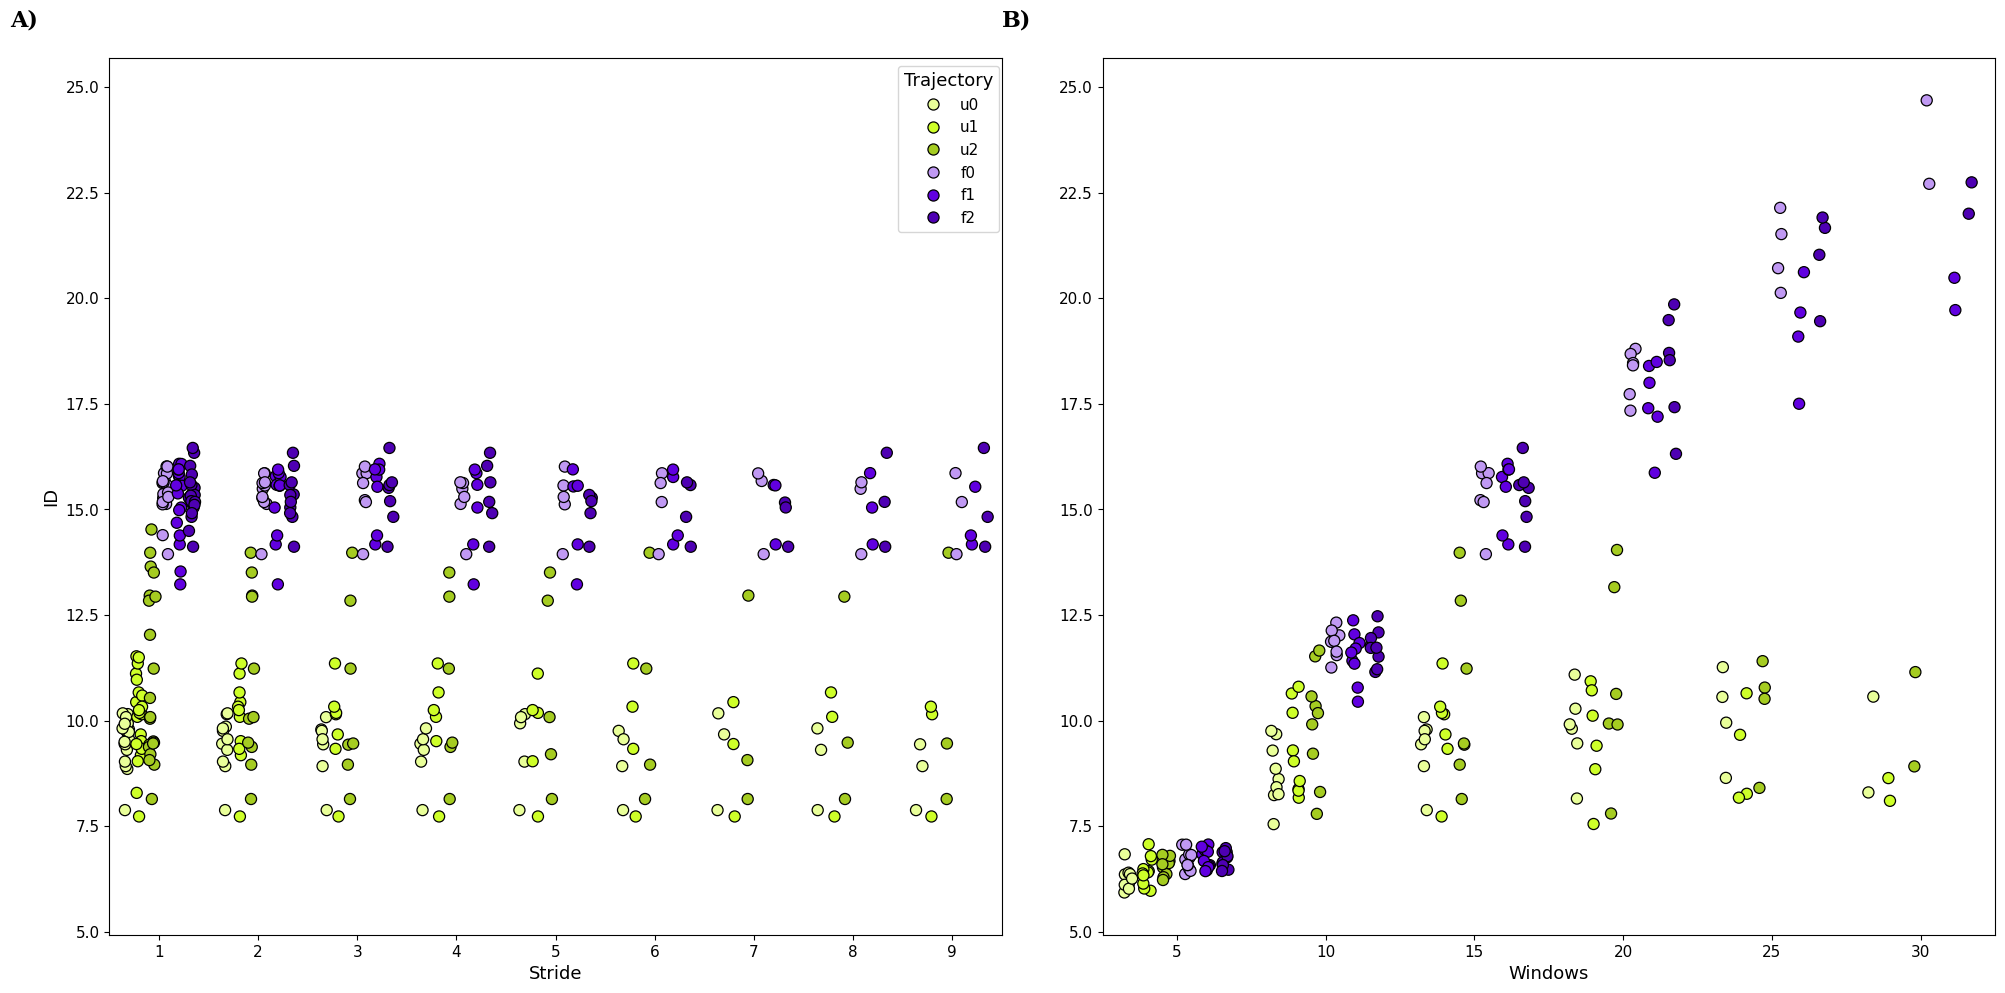

In [39]:
strides = pd.read_pickle("../extra/villin_sections/villin_strides_w15.pkl")
windows = pd.read_pickle("../extra/villin_sections/villin_windows_s3.pkl")

fig, ax = plt.subplots(figsize=(20,10), ncols = 2)
palette = colors.colors

sns.stripplot(data=strides, x='stride', y='entire simulation',
              hue='trajectory', palette=palette, dodge=True, jitter=0.2,
              size=8, edgecolor='black', linewidth=0.9, ax=ax[0])

sns.stripplot(data=windows, x='window_size', y='entire simulation',
              hue='trajectory', palette=palette, dodge=True, jitter=0.2,
              size=8, edgecolor='black', linewidth=0.9, ax=ax[1])

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(
    handles[:len(palette)], labels[:len(palette)],
    title="Trajectory", loc='upper left', bbox_to_anchor=(0.44, 0.94)
)

# Remove seaborn automatic legends
ax[0].legend_.remove()
ax[1].legend_.remove()

ymin = min(strides['entire simulation'].min(),
           windows['entire simulation'].min())
ymax = max(strides['entire simulation'].max(),
           windows['entire simulation'].max())
ax[0].set_ylim(ymin-1, ymax+1)
ax[1].set_ylim(ymin-1, ymax+1)

ax[0].set_xlabel("Stride")
ax[1].set_xlabel("Windows")
ax[0].set_ylabel("ID")
ax[1].set_ylabel("")

for ax_sub, label in zip([ax[0], ax[1]], ["A)", "B)"]):
    ax_sub.annotate(label, xy=(-0.08, 1.03), xycoords='axes fraction',
                    fontsize=16, fontweight='bold', fontfamily='serif',
                    ha='right', va='bottom')

plt.tight_layout()
plt.savefig("../extra/villin_sections/villin_sumup_w15_s3.pdf", dpi=300)
plt.show()


2025-12-02 14:27:21,887 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-02 14:27:21,891 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


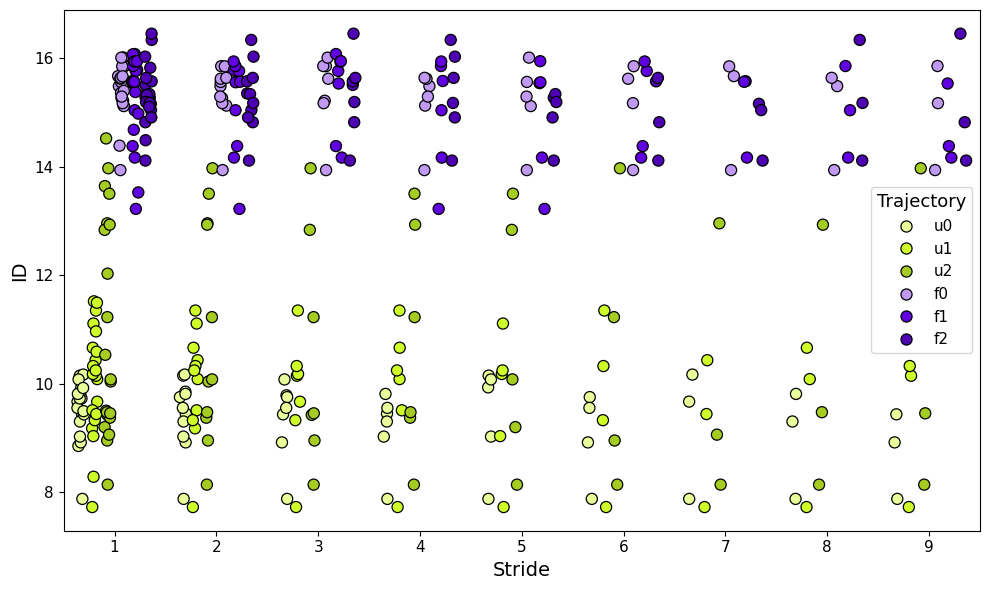

In [12]:
#sum-up plots
#MULTI STRIDE

results = pd.read_pickle("../extra/villin_sections/villin_strides_w15.pkl")

plt.figure(figsize=(10, 6))
palette = colors.colors

#sns.boxplot(data=results,x='stride',y='entire simulation',hue='trajectory',color='black',fill = False,showfliers=False,width=0.6,)
sns.stripplot(data=results,x='stride',y='entire simulation',hue='trajectory',palette=palette,dodge=True,jitter=0.2,size=8,edgecolor='black',linewidth=0.9)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:len(palette)], labels[:len(palette)],
           title="Trajectory",
           loc='best')

plt.xlabel("Stride", fontsize=14)
plt.ylabel("ID", fontsize=14)
plt.tight_layout()

plt.savefig("../extra/villin_sections/villin_sumup_strides_w15.pdf", dpi=300)
plt.show()



2025-12-02 14:22:02,085 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-02 14:22:02,090 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


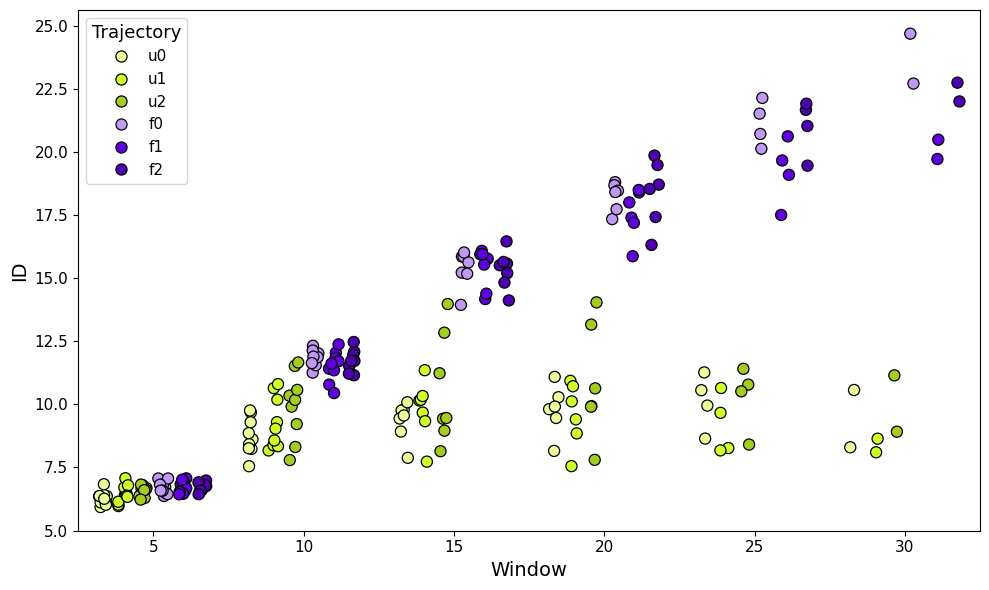

In [7]:
#sum-up plots
#MULTI WINDOWS

results = pd.read_pickle("../extra/villin_sections/villin_windows_s3.pkl")

plt.figure(figsize=(10, 6))
palette = colors.colors

#sns.boxplot(data=results,x='stride',y='entire simulation',hue='trajectory',color='black',fill = False,showfliers=False,width=0.6,)
sns.stripplot(data=results,x='window_size',y='entire simulation',hue='trajectory',palette=palette,dodge=True,jitter=0.2,size=8,edgecolor='black', linewidth=0.9)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:len(palette)], labels[:len(palette)],
           title="Trajectory",
           loc='upper left')

plt.xlabel("Window", fontsize=14)
plt.ylabel("ID", fontsize=14)
plt.set_box_aspect(1)
plt.tight_layout()

plt.savefig("../extra/villin_sections/villin_sumup_windows_s3.pdf", dpi=300)
plt.show()

